# Worksheet 16

Name:  Di Wang
UID:  U22721196

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

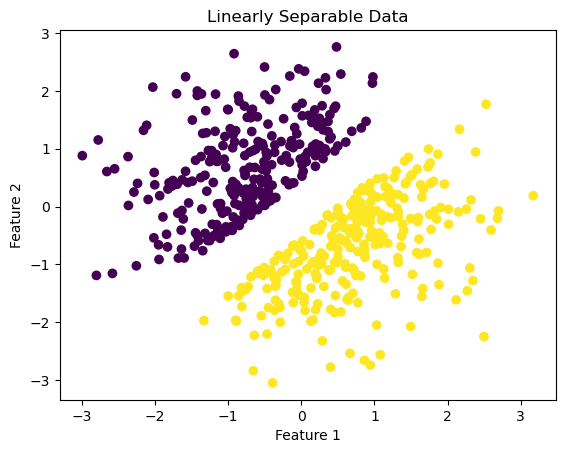

In [2]:
X, Y = generate_line_data()

# create a scatter plot of the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [3]:
# fit the logistic regression model
model = LogisticRegression().fit(X, Y)

# print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[ 4.11337993 -4.10105513]]
Intercept: [0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

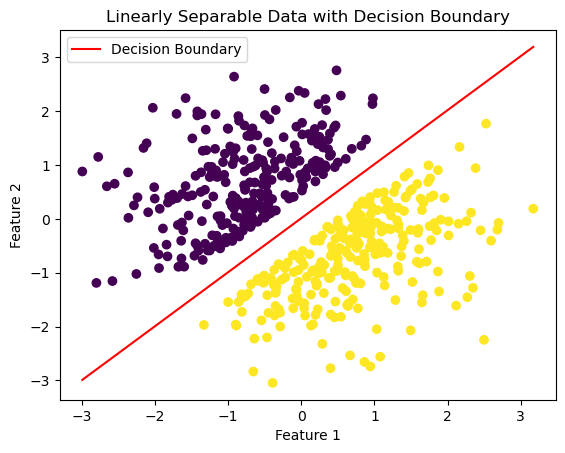

In [4]:
# extract the coefficients and intercept
coef = model.coef_.flatten()
intercept = model.intercept_

# plot the data points
plt.scatter(X[:,0], X[:,1], c=Y)

# plot the decision boundary line
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
x2 = (-coef[0]/coef[1])*x1 - (intercept/coef[1])
plt.plot(x1, x2, color='red', label='Decision Boundary')

# add labels and legend to the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data with Decision Boundary')
plt.legend()

# display the plot
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

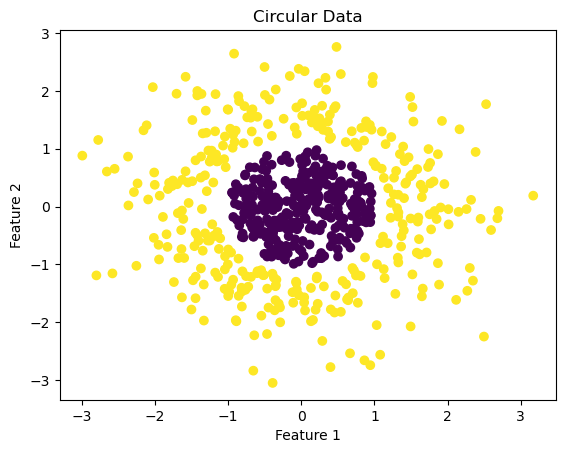

In [5]:
X, Y = generate_circle_data(t)

# create a scatter plot of the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circular Data')
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [19]:
# transform the data
X_transformed = np.zeros((X.shape[0], 2))
X_transformed[:, 0] = X[:, 0] ** 2
X_transformed[:, 1] = np.sqrt(2) * X[:, 0] * X[:, 1] + X[:, 1] ** 2

# fit the logistic regression model to the transformed data
model = LogisticRegression().fit(X_transformed, Y)

# print out the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)



Coefficients: [[5.0243884  2.66377069]]
Intercept: [-4.62403759]


f) Plot the decision boundary using the code below.

NameError: name 'cs' is not defined

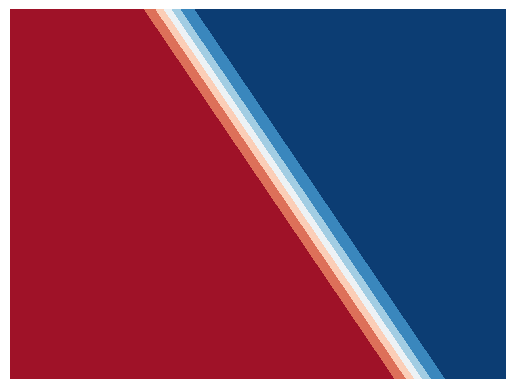

In [21]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=cs[Y].tolist(), s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

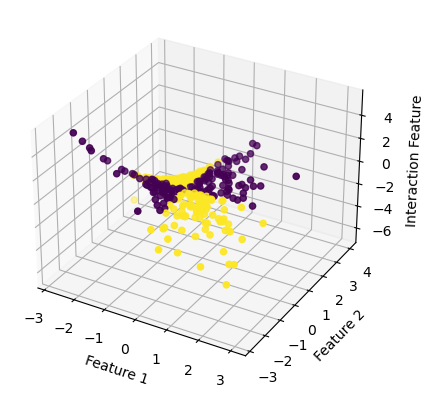

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate the XOR data
np.random.seed(1)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

# Plot the XOR data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_interact[:, 0], X_interact[:, 1], X_interact[:, 2], c=Y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Interaction Feature')
plt.show()


h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07944D+02    |proj g|=  9.88348D+01

At iterate    1    f=  1.29660D+02    |proj g|=  3.18352D+01

At iterate    2    f=  1.10431D+02    |proj g|=  2.15588D+01

At iterate    3    f=  8.68489D+01    |proj g|=  1.16767D+01

At iterate    4    f=  7.45024D+01    |proj g|=  9.34797D+00

At iterate    5    f=  7.01421D+01    |proj g|=  4.02534D+00

At iterate    6    f=  6.80788D+01    |proj g|=  1.09211D+00

At iterate    7    f=  6.78584D+01    |proj g|=  2.37813D-01

At iterate    8    f=  6.78424D+01    |proj g|=  1.69330D-01

At iterate    9    f=  6.78372D+01    |proj g|=  1.23660D-01

At iterate   10    f=  6.78333D+01    |proj g|=  2.20193D-01

At iterate   11    f=  6.78309D+01    |proj g|=  4.56452D-02

At iterate   12    f=  6.78307D+01    |proj g|=  2.05662D-02

At iterate   13    f=  6.7

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


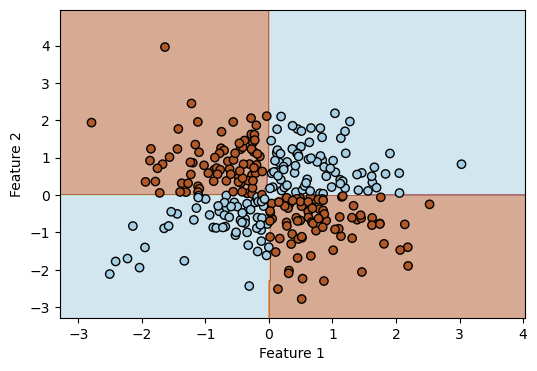

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# create interaction term
X_interact = np.zeros((X.shape[0], 3))
X_interact[:, 0] = X[:, 0]
X_interact[:, 1] = X[:, 1]
X_interact[:, 2] = X[:, 0] * X[:, 1]

# fit the logistic regression model to the transformed data
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X_interact, Y)

# plot the decision boundary
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel(), (xx * yy).ravel()]

Z = model.predict(meshData)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='black')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()


i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Users/victor/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

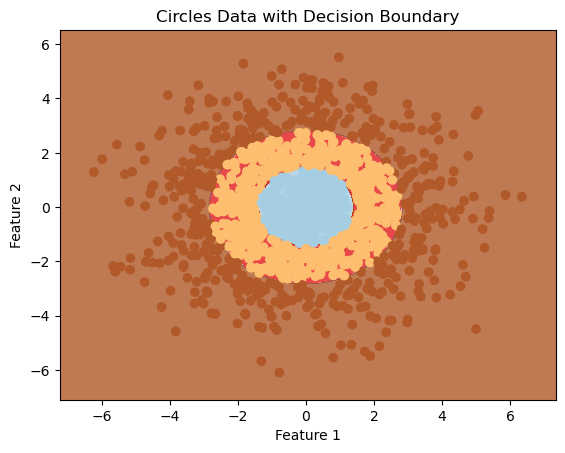

In [29]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

# plot the decision boundary
fig, ax = plt.subplots()
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Circles Data with Decision Boundary')
plt.show()